In [2]:
# %%file requirements.txt
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    # confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime


path = '/content/drive/MyDrive/Colab Notebooks/MLOps_Thy/mlops_hackathon_2023/mlops_hackathon_phase_01/prob-2/raw_train.parquet'
import pyarrow.parquet as pq

df = pq.read_table(source=path).to_pandas()
df.describe(include='all').T

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature1,60000,4,V3,23659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature2,60000.000,NaN,NaN,NaN,20.863,12.083,0.649,11.959,18.088,24.903,73.202
feature3,60000,5,V2,31782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature4,60000,11,V3,16634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature5,60000.000,NaN,NaN,NaN,3207.836,2792.931,-5997.670,1388.208,2273.676,3813.300,19046.986
feature6,60000,5,V0,35846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature7,60000,5,V2,20178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature8,60000.000,NaN,NaN,NaN,2.954,1.121,1.000,2.000,3.000,4.000,4.000
feature9,60000,5,V2,32919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature10,60000,3,V0,54407,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.describe(include="object").T

,count,unique,top,freq
feature1,60000,4,V3,23659
feature3,60000,5,V2,31782
feature4,60000,11,V3,16634
feature6,60000,5,V0,35846
feature7,60000,5,V2,20178
feature9,60000,5,V2,32919
feature10,60000,3,V0,54407
feature12,60000,4,V2,19540
feature14,60000,3,none,48517
feature15,60000,3,V1,42275


In [3]:
df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.782,V2,V8,1337.025,V4,V4,2.000,V2,V0,4.000,V2,35.689,none,V1,1.000,V2,1.000,none,yes,0
1,V3,22.765,V4,V2,1664.415,V0,V4,4.000,V1,V0,2.000,V0,23.266,none,V1,2.000,V2,1.000,none,yes,0
2,V3,7.462,V2,V3,750.653,V3,V2,4.000,V2,V0,4.000,V2,34.061,stores,V0,1.000,V2,1.000,yes,yes,0
3,V3,23.718,V4,V7,4829.002,V4,V2,4.000,V1,V0,4.000,V3,62.477,none,V1,2.000,V1,1.000,none,yes,0
4,V3,13.769,V3,V3,3559.956,V3,V4,1.000,V1,V0,4.000,V2,41.999,bank,V1,1.000,V2,1.000,yes,yes,0


In [17]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for cat_cols in (
        df.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                df[cat_cols].value_counts(),                          # Count
                df[cat_cols].value_counts(normalize=True) * 100,      # Percentage
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

category_unique_value()

Unique values and corresponding data counts for feature: feature1
------------------------------------------------------------------------------------------
    Count  Percentage
V3  23659      39.432
V0  16355      27.258
V1  16130      26.883
V2   3856       6.427
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature3
------------------------------------------------------------------------------------------
    Count  Percentage
V2  31782      52.970
V4  17474      29.123
V3   5317       8.862
V1   2936       4.893
V0   2491       4.152
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature4
------------------------------------------------------------------------------------------
     Count  Percentage
V3   16634      27.723
V0   14005      23.342
V2   10761      17.935
V1    6183   

In [25]:
# The static variables

# For dropping columns
# columns_to_drop = [
#         "feature1",
#         "feature3",
#         "feature4",
#         "feature6",
#         "feature7",
#         "feature8",
#         "feature9",
#         "feature10",
#         "feature11",
#         "feature12",
#         "feature14",
#         "feature15",
#         "feature16",
#         "feature17",
#         "feature19",
#         "feature20"
# ]
columns_to_drop = []
# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
# target_mapper = {"fraud": 1, "not_fraud": 0}


# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)
X,y = df.drop(columns=["label"]),  df["label"]

# Splitting data into training, validation and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)

# print(
#     "Training data shape: \n\n",
#     X_train.shape,
#     "\n\nValidation Data Shape: \n\n",
#     X_val.shape,
#     "\n\nTesting Data Shape: \n\n",
#     X_test.shape,
# )

# print("Training: \n", y_train.value_counts(normalize=True))
# print("\n\nValidation: \n", y_val.value_counts(normalize=True))
# print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training data shape: 

 (36000, 20) 

Validation Data Shape: 

 (12000, 20) 

Testing Data Shape: 

 (12000, 20)
Training: 
 0   0.696
1   0.304
Name: label, dtype: float64


Validation: 
 0   0.696
1   0.304
Name: label, dtype: float64


Test: 
 0   0.696
1   0.304
Name: label, dtype: float64


# Data Processing

In [26]:
# %%file data_preprocessing_prob2.py
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


if __name__ == "__main__":
  # To Standardize feature names
  feature_name_standardizer = FeatureNamesStandardizer()

  X_train = feature_name_standardizer.fit_transform(X_train)
  X_val = feature_name_standardizer.transform(X_val)
  X_test = feature_name_standardizer.transform(X_test)


  # To impute categorical Nulls to Unknown
  cat_columns = X_train.select_dtypes(include="category").columns.tolist()
  imputer = FillUnknown()

  X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
  X_val[cat_columns] = imputer.transform(X_val[cat_columns])
  X_test[cat_columns] = imputer.transform(X_test[cat_columns])

  # To encode the data
  one_hot = PandasOneHot()

  X_train = one_hot.fit_transform(X_train)
  X_val = one_hot.transform(X_val)
  X_test = one_hot.transform(X_test)


  # Scale the numerical columns
  robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
  num_columns = [
        "feature2",
        "feature5",
        "feature13",
        "feature18"
      ]

  X_train[num_columns] = pd.DataFrame(
      robust_scaler.fit_transform(X_train[num_columns]),
      columns=num_columns,
      index=X_train.index,
  )
  X_val[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
  )
  X_test[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_test[num_columns]),
      columns=num_columns,
      index=X_test.index,
  )


In [27]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (36000, 50) 

Validation Data Shape: 

 (12000, 50) 

Testing Data Shape: 

 (12000, 50)


# Model Build 

In [28]:
# %%file origin_model.py
# (Not downsampling yet)

## STEP 1: get metrics score: Accuracy, Recall, F1-score
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores


## get confusion matrix
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")


## STEP 2: defining empty lists to add train and test results to add to each model

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)


# Plotting boxplots for CV scores of all models defined above
def make_boxplot(cv_result, model_name): 
  fig = plt.figure(figsize=(17, 7))

  fig.suptitle("Algorithm cross_val_score Comparison")
  ax = fig.add_subplot(111)

  plt.boxplot(cv_results)
  ax.set_xticklabels(model_names)
  ax.set(
      xlabel='MODELS',
      ylabel='cross_val_score value',
  )
  return plt.show()


## STEP 3: model build and performance comparision: 
if __name__ == "__main__":
  models = []  # Empty list to store all the models
  cv_results = []

  # Appending models into the list
  models.append(("Bagging", BaggingClassifier(random_state=seed)))
  models.append(("Random forest", RandomForestClassifier(random_state=seed)))
  models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
  models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
  models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
  models.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=seed)))
  models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed)))

  # For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
  for name, model in models:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result = cross_val_score(
          estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result)

      model.fit(X_train, y_train)
      model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
      add_score_model(name, model_score, cv_result.mean())

  print("Operation Completed!")

  

Operation Completed!


In [29]:
## STEP 4: visualize all models result to compare performances
  # comparison frame
comparison_frame = pd.DataFrame(
      {
          "Model": model_names,
          "Cross_Val_Score_Train": cross_val_train,
          "Train_Accuracy": acc_train,
          "Test_Accuracy": acc_test,
          "Train_Recall": recall_train,
          "Test_Recall": recall_test,
          "Train_Precision": precision_train,
          "Test_Precision": precision_test,
          "Train_F1": f1_train,
          "Test_F1": f1_test,
          "Train_ROC_AUC": roc_auc_train,
          "Test_ROC_AUC": roc_auc_test,
      }
  )

  # Sorting models in decreasing order of test recall
comparison_frame.sort_values(
      by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
  ).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

 

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
4,Xgboost,0.596945,0.877389,0.809250,0.729344,0.609113,0.845550,0.719520,0.783160,0.659729,0.939796,0.865982
6,Light GBM,0.582670,0.832778,0.810000,0.625400,0.580840,0.780162,0.737539,0.694261,0.649877,0.892008,0.869712
2,GBM,0.518713,0.799361,0.796833,0.529783,0.530332,0.735331,0.726589,0.615859,0.613139,0.849562,0.851639
3,Adaboost,0.518529,0.783917,0.782833,0.519901,0.522097,0.691746,0.687387,0.593637,0.593448,0.827663,0.831930
5,DecisionTreeClassifier,0.514775,1.000000,0.693583,1.000000,0.519352,1.000000,0.495547,1.000000,0.507171,1.000000,0.644443
1,Random forest,0.501145,1.000000,0.789833,1.000000,0.505627,1.000000,0.718689,1.000000,0.593619,1.000000,0.838356
0,Bagging,0.455393,0.983139,0.764000,0.949492,0.466099,0.994728,0.656867,0.971584,0.545279,0.999135,0.785774


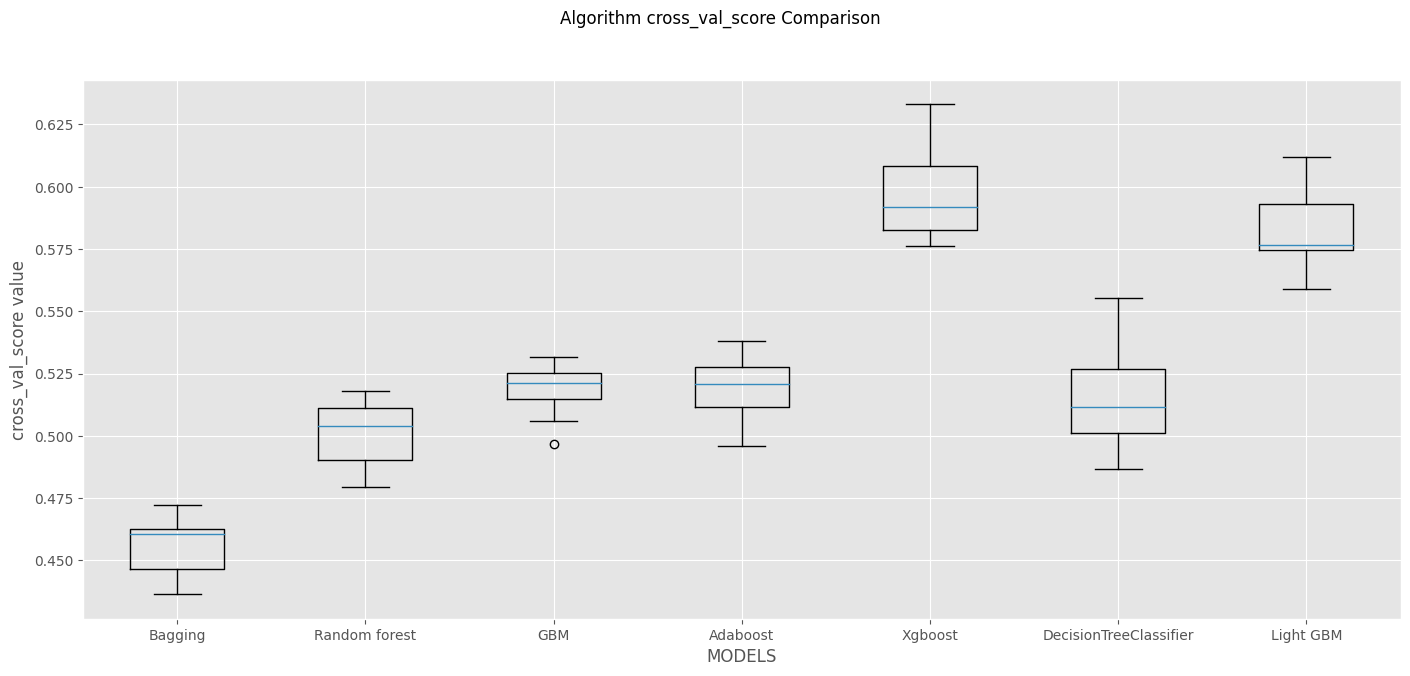

None


In [30]:
 # Also show boxplot on models performance: 
print(make_boxplot(cv_result=cv_results, model_name=model_names))

không khả quan
